In [1]:
import sys
import os

# Add the 'oracle' directory to the Python path
sys.path.append(os.path.join(os.getcwd(), 'oracle'))
import oracle


In [2]:
res = oracle.q1_fish_train_test_data(23607)
print(res[0])

('Wearing_Lipstick', 'Big_Lips')


So, the classes are: **Wearing_Lipstick & Big_Lips**

Now, res is a 5-tuple: ((‘attribute 1’, ‘attribute 2’), [train image
tensors...], [train labels...], [test image tensor...], [test labels...])
<br>
So, we store different components of res in different variables.

In [3]:
attributes = res[0]
train_img = res[1]
train_labels = res[2]
test_img = res[3]
test_labels = res[4]

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
train_img = np.array(train_img)
train_labels = np.array(train_labels)
test_img = np.array(test_img)
test_labels = np.array(test_labels)



In [7]:
# We segregate the data into 4 classes
train_img_0 = train_img[train_labels == 0]
train_img_1 = train_img[train_labels == 1]
train_img_2 = train_img[train_labels == 2]
train_img_3 = train_img[train_labels == 3]

test_img_0 = test_img[test_labels == 0]
test_img_1 = test_img[test_labels == 1]
test_img_2 = test_img[test_labels == 2]
test_img_3 = test_img[test_labels == 3]

In [8]:
# we flatten the images
train_img_0 = train_img_0.reshape(train_img_0.shape[0], -1)
train_img_1 = train_img_1.reshape(train_img_1.shape[0], -1)
train_img_2 = train_img_2.reshape(train_img_2.shape[0], -1)
train_img_3 = train_img_3.reshape(train_img_3.shape[0], -1)

test_img_0 = test_img_0.reshape(test_img_0.shape[0], -1)
test_img_1 = test_img_1.reshape(test_img_1.shape[0], -1)
test_img_2 = test_img_2.reshape(test_img_2.shape[0], -1)
test_img_3 = test_img_3.reshape(test_img_3.shape[0], -1)

In [9]:
# We calculate the mean of each class
m0 = np.mean(train_img_0, axis=0)
m1 = np.mean(train_img_1, axis=0)
m2 = np.mean(train_img_2, axis=0)
m3 = np.mean(train_img_3, axis=0)

# We calculate the covariance matrix of each class
s1 = np.cov(train_img_0.T)
s2 = np.cov(train_img_1.T)
s3 = np.cov(train_img_2.T)
s4 = np.cov(train_img_3.T)

In [10]:
# total mean
m_T = (m0 + m1 + m2 + m3) / 4

# total covariance matrix
s_T= np.cov(train_img.reshape(train_img.shape[0], -1).T) 
s_W = (s1 + s2 + s3 + s4)

In [11]:
print("Total mean norm",np.linalg.norm(m_T))
print("c0 mean norm",np.linalg.norm(m0))
print("c1 mean norm",np.linalg.norm(m1))
print("c2 mean norm",np.linalg.norm(m2))
print("c3 mean norm",np.linalg.norm(m3))

Total mean norm 24.743484
c0 mean norm 24.35474
c1 mean norm 24.194138
c2 mean norm 25.651348
c3 mean norm 24.94596


# Q1.1. Estimates:
### Mean and variances for each class for n = 50, 100, 500, 1000, 2000, 4000.

In [12]:
%pip install tabulate
import tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
# n = 50
train_img_0_50 = train_img_0[:50]
train_img_1_50 = train_img_1[:50]
train_img_2_50 = train_img_2[:50]
train_img_3_50 = train_img_3[:50]

# n = 100
train_img_0_100 = train_img_0[:100]
train_img_1_100 = train_img_1[:100]
train_img_2_100 = train_img_2[:100]
train_img_3_100 = train_img_3[:100]

# n = 500
train_img_0_500 = train_img_0[:500]
train_img_1_500 = train_img_1[:500]
train_img_2_500 = train_img_2[:500]
train_img_3_500 = train_img_3[:500]

# n = 1000
train_img_0_1000 = train_img_0[:1000]
train_img_1_1000 = train_img_1[:1000]
train_img_2_1000 = train_img_2[:1000]
train_img_3_1000 = train_img_3[:1000]

# n = 2000
train_img_0_2000 = train_img_0[:2000]
train_img_1_2000 = train_img_1[:2000]
train_img_2_2000 = train_img_2[:2000]
train_img_3_2000 = train_img_3[:2000]

# n = 5000
train_img_0_5000 = train_img_0[:5000]
train_img_1_5000 = train_img_1[:5000]
train_img_2_5000 = train_img_2[:5000]
train_img_3_5000 = train_img_3[:5000]

Mean norms of each class for different n:
╭────────┬─────────┬─────────┬─────────┬─────────╮
│        │      c0 │      c1 │      c2 │      c3 │
├────────┼─────────┼─────────┼─────────┼─────────┤
│ n=50   │ 24.3725 │ 24.4161 │ 26.0036 │ 25.0284 │
│ n=100  │ 25.3359 │ 24.5907 │ 26.2031 │ 25.0048 │
│ n=500  │ 24.8841 │ 23.9361 │ 25.3278 │ 25.3108 │
│ n=1000 │ 24.4111 │ 23.9369 │ 25.6027 │ 25.2434 │
│ n=2000 │ 24.3727 │ 24.0799 │ 25.6493 │ 25.0484 │
│ n=5000 │ 24.3547 │ 24.1941 │ 25.6513 │ 24.946  │
╰────────┴─────────┴─────────┴─────────┴─────────╯


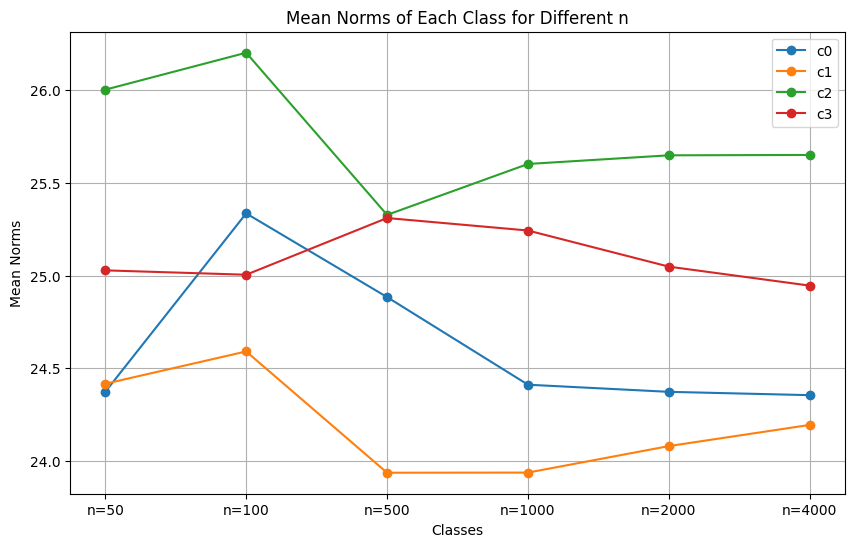

In [14]:
# headers c0, c1, c2, c3; rows n=50, n=100, n=200, n=500, n=1000, n=2000, n=5000
table = [
    ["n=50", np.linalg.norm(np.mean(train_img_0_50, axis=0)), np.linalg.norm(np.mean(train_img_1_50, axis=0)), np.linalg.norm(np.mean(train_img_2_50, axis=0)), np.linalg.norm(np.mean(train_img_3_50, axis=0))],
    ["n=100", np.linalg.norm(np.mean(train_img_0_100, axis=0)), np.linalg.norm(np.mean(train_img_1_100, axis=0)), np.linalg.norm(np.mean(train_img_2_100, axis=0)), np.linalg.norm(np.mean(train_img_3_100, axis=0))],
    ["n=500", np.linalg.norm(np.mean(train_img_0_500, axis=0)), np.linalg.norm(np.mean(train_img_1_500, axis=0)), np.linalg.norm(np.mean(train_img_2_500, axis=0)), np.linalg.norm(np.mean(train_img_3_500, axis=0))],
    ["n=1000", np.linalg.norm(np.mean(train_img_0_1000, axis=0)), np.linalg.norm(np.mean(train_img_1_1000, axis=0)), np.linalg.norm(np.mean(train_img_2_1000, axis=0)), np.linalg.norm(np.mean(train_img_3_1000, axis=0))],
    ["n=2000", np.linalg.norm(np.mean(train_img_0_2000, axis=0)), np.linalg.norm(np.mean(train_img_1_2000, axis=0)), np.linalg.norm(np.mean(train_img_2_2000, axis=0)), np.linalg.norm(np.mean(train_img_3_2000, axis=0))],
    ["n=5000", np.linalg.norm(np.mean(train_img_0_5000, axis=0)), np.linalg.norm(np.mean(train_img_1_5000, axis=0)), np.linalg.norm(np.mean(train_img_2_5000, axis=0)), np.linalg.norm(np.mean(train_img_3_5000, axis=0))],
]

print("Mean norms of each class for different n:")
print(tabulate.tabulate(table, headers=["c0", "c1", "c2", "c3"], tablefmt="rounded_outline"))

# Plotting the graph
n_values = ["n=50", "n=100", "n=500", "n=1000", "n=2000", "n=4000"]
c0_values = [row[1] for row in table]
c1_values = [row[2] for row in table]
c2_values = [row[3] for row in table]
c3_values = [row[4] for row in table]

plt.figure(figsize=(10, 6))
plt.plot(n_values, c0_values, marker='o', label='c0')
plt.plot(n_values, c1_values, marker='o', label='c1')
plt.plot(n_values, c2_values, marker='o', label='c2')
plt.plot(n_values, c3_values, marker='o', label='c3')

plt.xlabel('Classes')
plt.ylabel('Mean Norms')
plt.title('Mean Norms of Each Class for Different n')
plt.legend()
plt.grid(True)
plt.show()




### Variance Norms for n = 50, 100, 500, 1000, 2000, 4000

Covariance norms of each class for different n:
╭────────┬─────────┬──────────┬─────────┬─────────╮
│        │      c0 │       c1 │      c2 │      c3 │
├────────┼─────────┼──────────┼─────────┼─────────┤
│ n=50   │ 79.2707 │ 128.033  │ 92.0379 │ 89.4493 │
│ n=100  │ 88.4562 │ 105.289  │ 90.1574 │ 81.981  │
│ n=500  │ 87.7814 │  98.7399 │ 84.0281 │ 89.5576 │
│ n=1000 │ 91.1905 │ 103.974  │ 86.1804 │ 87.9867 │
│ n=2000 │ 92.4639 │ 105.116  │ 88.024  │ 88.267  │
│ n=4000 │ 94.2818 │ 105.772  │ 87.6579 │ 88.1412 │
╰────────┴─────────┴──────────┴─────────┴─────────╯


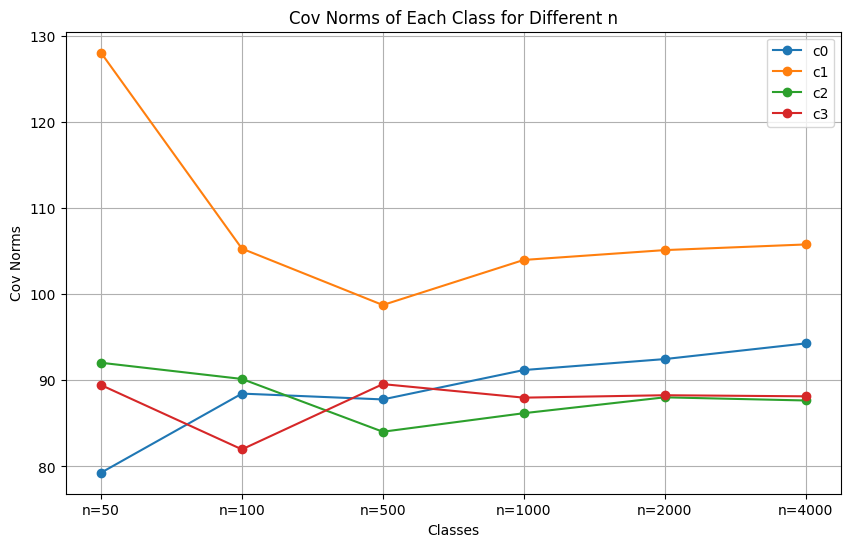

In [15]:
# NOTE: np.linalg.norm() automatically take frobenius norm for matrices.
table = [
    ["n=50", np.linalg.norm(np.cov(train_img_0_50.T)), np.linalg.norm(np.cov(train_img_1_50.T)), np.linalg.norm(np.cov(train_img_2_50.T)), np.linalg.norm(np.cov(train_img_3_50.T))],
    ["n=100", np.linalg.norm(np.cov(train_img_0_100.T)), np.linalg.norm(np.cov(train_img_1_100.T)), np.linalg.norm(np.cov(train_img_2_100.T)), np.linalg.norm(np.cov(train_img_3_100.T))],
    ["n=500", np.linalg.norm(np.cov(train_img_0_500.T)), np.linalg.norm(np.cov(train_img_1_500.T)), np.linalg.norm(np.cov(train_img_2_500.T)), np.linalg.norm(np.cov(train_img_3_500.T))],
    ["n=1000", np.linalg.norm(np.cov(train_img_0_1000.T)), np.linalg.norm(np.cov(train_img_1_1000.T)), np.linalg.norm(np.cov(train_img_2_1000.T)), np.linalg.norm(np.cov(train_img_3_1000.T))],
    ["n=2000", np.linalg.norm(np.cov(train_img_0_2000.T)), np.linalg.norm(np.cov(train_img_1_2000.T)), np.linalg.norm(np.cov(train_img_2_2000.T)), np.linalg.norm(np.cov(train_img_3_2000.T))],
    ["n=4000", np.linalg.norm(np.cov(train_img_0_5000.T)), np.linalg.norm(np.cov(train_img_1_5000.T)), np.linalg.norm(np.cov(train_img_2_5000.T)), np.linalg.norm(np.cov(train_img_3_5000.T))],
]

print("Covariance norms of each class for different n:")
print(tabulate.tabulate(table, headers=["c0", "c1", "c2", "c3"], tablefmt="rounded_outline"))

# Plotting the graph
n_values = ["n=50", "n=100", "n=500", "n=1000", "n=2000", "n=4000"]
c0_values = [row[1] for row in table]
c1_values = [row[2] for row in table]
c2_values = [row[3] for row in table]
c3_values = [row[4] for row in table]

plt.figure(figsize=(10, 6))
plt.plot(n_values, c0_values, marker='o', label='c0')
plt.plot(n_values, c1_values, marker='o', label='c1')
plt.plot(n_values, c2_values, marker='o', label='c2')
plt.plot(n_values, c3_values, marker='o', label='c3')

plt.xlabel('Classes')
plt.ylabel('Cov Norms')
plt.title('Cov Norms of Each Class for Different n')
plt.legend()
plt.grid(True)
plt.show()

# Q1.2 (a)


We first calculate S_i and thus S_W
Then we calc. m (total mean) and thus S_T
Taking S_T = S_W + S_B, we get S_B

In [16]:
def verify_eigvalues(eigvalues,c):
    # we compare the c-1 th and c th eigenvalues, and see if there is a significant order difference
    q = eigvalues[c-2] // eigvalues[c-1]
    print("(c-1)th eig val / cth eig val:", q)
    if q > 100:
        print("Significant order difference")
    else:
        print("No significant order difference")

In [ ]:
n_all = [5000] # TODO: Add all the values of n given in the question
W_T = []
W_T_all = []
c = 4 # number of classes

s_W = np.zeros((train_img.shape[1], train_img.shape[1]))
s_B = np.zeros((train_img.shape[1], train_img.shape[1]))
for n in n_all:
    print("n:", n, "__________________________")

    train_img_0_n = train_img_0[:n]
    train_img_1_n = train_img_1[:n]
    train_img_2_n = train_img_2[:n]
    train_img_3_n = train_img_3[:n]

    m0_n = np.mean(train_img_0_n, axis=0)
    m1_n = np.mean(train_img_1_n, axis=0)
    m2_n = np.mean(train_img_2_n, axis=0)
    m3_n = np.mean(train_img_3_n, axis=0)

    # # Calculate scatter matrices using the proper formula: S = ∑ (x - m) (x - m)^T
    s0_n = np.cov(train_img_0_n.T)*(n-1)
    s1_n = np.cov(train_img_1_n.T)*(n-1)
    s2_n = np.cov(train_img_2_n.T)*(n-1)
    s3_n = np.cov(train_img_3_n.T)*(n-1)

    print("Calculating s_W and s_B")
    s_W_n = s0_n + s1_n + s2_n + s3_n
    s_W += s_W_n
    print("s_W_n shape:", s_W_n.shape)
    m = (m0_n + m1_n + m2_n + m3_n) / 4  # total mean # number of data points same for each class
    s_B_n = n * ((m0_n - m).reshape(-1, 1).dot((m0_n - m).reshape(-1, 1).T) + (m1_n - m).reshape(-1, 1).dot((m1_n - m).reshape(-1, 1).T) + (m2_n - m).reshape(-1, 1).dot((m2_n - m).reshape(-1, 1).T) + (m3_n - m).reshape(-1, 1).dot((m3_n - m).reshape(-1, 1).T))
    s_B += s_B_n
    print("Calculating eigenvectors")




    # We calculate the eigenvalues and eigenvectors of s_W^-1 * s_B
    # if np.linalg.det(s_W_n) == 0:
    #     print("S_W is singular")
    eigvals, eigvecs = np.linalg.eig(np.linalg.inv(s_W_n).dot(s_B_n))
    eigvecs = eigvecs.real
    eigvals = eigvals.real


    # We sort the eigenvectors by decreasing eigenvalues
    idx = eigvals.argsort()[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    verify_eigvalues(eigvals, c) # passed after sorting
    
    W_T.append(eigvecs[:, :c-1]) # We take the first c-1 eigenvectors
    W_T_all.append(W_T)
    W_T = []
    print(eigvals[:5])



    

In [ ]:
train_img = np.array(train_img)
train_labels = np.array(train_labels)
test_img = np.array(test_img)
test_labels = np.array(test_labels)


In [ ]:
W = W_T_all[-1][0]
print("W shape:", W.shape)
#find the projection of the data
print(train_img.shape)
print(test_img.shape)

train_img = train_img.reshape(train_img.shape[0], -1)
test_img = test_img.reshape(test_img.shape[0], -1)

print(train_img.shape)
print(test_img.shape)


W shape: (3072, 3)
(20000, 3, 32, 32)
(1000, 3, 32, 32)
(20000, 3072)
(1000, 3072)


In [ ]:
test_img_proj = test_img.dot(W)
train_img_proj = train_img.dot(W)

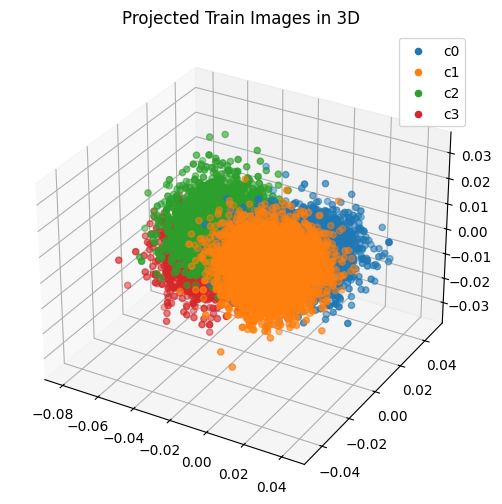

In [ ]:
# plot the projected train images in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_img_proj[train_labels == 0, 0], train_img_proj[train_labels == 0, 1], train_img_proj[train_labels == 0, 2], label='c0')
ax.scatter(train_img_proj[train_labels == 1, 0], train_img_proj[train_labels == 1, 1], train_img_proj[train_labels == 1, 2], label='c1')
ax.scatter(train_img_proj[train_labels == 2, 0], train_img_proj[train_labels == 2, 1], train_img_proj[train_labels == 2, 2], label='c2')
ax.scatter(train_img_proj[train_labels == 3, 0], train_img_proj[train_labels == 3, 1], train_img_proj[train_labels == 3, 2], label='c3')
plt.title('Projected Train Images in 3D')
plt.legend()
plt.show()

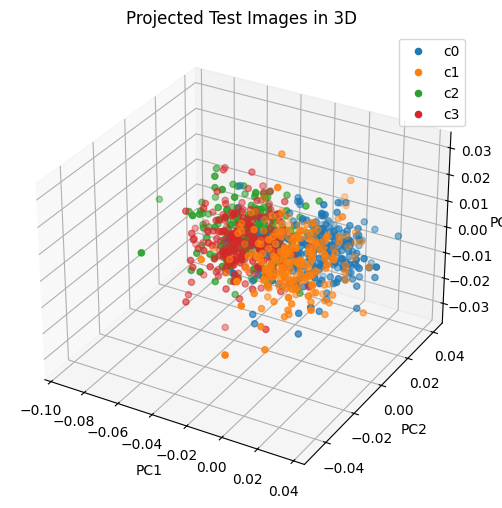

In [ ]:
# plot the projected test images in 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_img_proj[test_labels == 0, 0], test_img_proj[test_labels == 0, 1], test_img_proj[test_labels == 0, 2], label='c0')
ax.scatter(test_img_proj[test_labels == 1, 0], test_img_proj[test_labels == 1, 1], test_img_proj[test_labels == 1, 2], label='c1')
ax.scatter(test_img_proj[test_labels == 2, 0], test_img_proj[test_labels == 2, 1], test_img_proj[test_labels == 2, 2], label='c2')
ax.scatter(test_img_proj[test_labels == 3, 0], test_img_proj[test_labels == 3, 1], test_img_proj[test_labels == 3, 2], label='c3')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Projected Test Images in 3D')
plt.legend()
plt.show()

Now we get the objective values for each n, 20 times, and do box plots for each n.

In [ ]:
n_all = [2500, 3500, 4000, 4500,5000] 
W_T_all = []
c = 4 # number of classes

objective_values = {} # key: n, value: 20 objective values list

for n in n_all:
    print("n:", n, "__________________________")
    rng = 20
    if n == 5000:
        rng = 1

    for i in range(rng):
        print("Iteration:", i)

        indices = np.random.choice(train_img_0.shape[0], n, replace=False)
        train_img_0_n = train_img_0[indices]
        train_img_1_n = train_img_1[indices]
        train_img_2_n = train_img_2[indices]
        train_img_3_n = train_img_3[indices]

        m0_n = np.mean(train_img_0_n, axis=0)
        m1_n = np.mean(train_img_1_n, axis=0)
        m2_n = np.mean(train_img_2_n, axis=0)
        m3_n = np.mean(train_img_3_n, axis=0)

        # Calculate scatter matrices using the proper formula: S = ∑ (x - m) (x - m)^T
        s0_n = np.cov(train_img_0_n.T)*(n-1)
        s1_n = np.cov(train_img_1_n.T)*(n-1)
        s2_n = np.cov(train_img_2_n.T)*(n-1)
        s3_n = np.cov(train_img_3_n.T)*(n-1)

        print("Calculating s_W and s_B")
        s_W_n = s0_n + s1_n + s2_n + s3_n
        print("s_W_n shape:", s_W_n.shape)
        m = (m0_n + m1_n + m2_n + m3_n) / 4  # total mean # number of data points same for each class
        s_B_n = n * ((m0_n - m).reshape(-1, 1).dot((m0_n - m).reshape(-1, 1).T) + (m1_n - m).reshape(-1, 1).dot((m1_n - m).reshape(-1, 1).T) + (m2_n - m).reshape(-1, 1).dot((m2_n - m).reshape(-1, 1).T) + (m3_n - m).reshape(-1, 1).dot((m3_n - m).reshape(-1, 1).T))

        print("Calculating eigenvalues")
        # We calculate the eigenvalues and eigenvectors of s_W^-1 * s_B
        eigvals, eigvecs = np.linalg.eig(np.linalg.inv(s_W_n).dot(s_B_n))
        eigvals = eigvals.real

        # Sort eigenvalues in descending order
        eigvals_sorted = np.sort(eigvals)[::-1]

        # Sum the first three eigenvalues
        sum_top3_eigvals = np.sum(eigvals_sorted[:3])
        print("Sum of top 3 eigenvalues:", sum_top3_eigvals)

        objective_values[n] = objective_values.get(n, [])
        objective_values[n].append(sum_top3_eigvals)

    print(objective_values)

n: 2500 __________________________
Iteration: 0
Calculating s_W and s_B
s_W_n shape: (3072, 3072)
Calculating eigenvalues
Sum of top 3 eigenvalues: 4.4901391582420835
Iteration: 1
Calculating s_W and s_B
s_W_n shape: (3072, 3072)
Calculating eigenvalues
Sum of top 3 eigenvalues: 4.407481294473592
Iteration: 2
Calculating s_W and s_B
s_W_n shape: (3072, 3072)
Calculating eigenvalues
Sum of top 3 eigenvalues: 4.446600047500906
Iteration: 3
Calculating s_W and s_B
s_W_n shape: (3072, 3072)
Calculating eigenvalues
Sum of top 3 eigenvalues: 4.454266098647397
Iteration: 4
Calculating s_W and s_B
s_W_n shape: (3072, 3072)
Calculating eigenvalues
Sum of top 3 eigenvalues: 4.409980319851906
Iteration: 5
Calculating s_W and s_B
s_W_n shape: (3072, 3072)
Calculating eigenvalues
Sum of top 3 eigenvalues: 4.4175908576067044
Iteration: 6
Calculating s_W and s_B
s_W_n shape: (3072, 3072)
Calculating eigenvalues
Sum of top 3 eigenvalues: 4.433627713614499
Iteration: 7
Calculating s_W and s_B
s_W_n sha

In [ ]:
# save the objective values to a txt file
with open('objective_values.txt', 'w') as f:
    for n, values in objective_values.items():
        f.write(f'n={n}: {values}\n')

/tmp/ipykernel_186829/1820017919.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(objective_values.values(), labels=objective_values.keys())


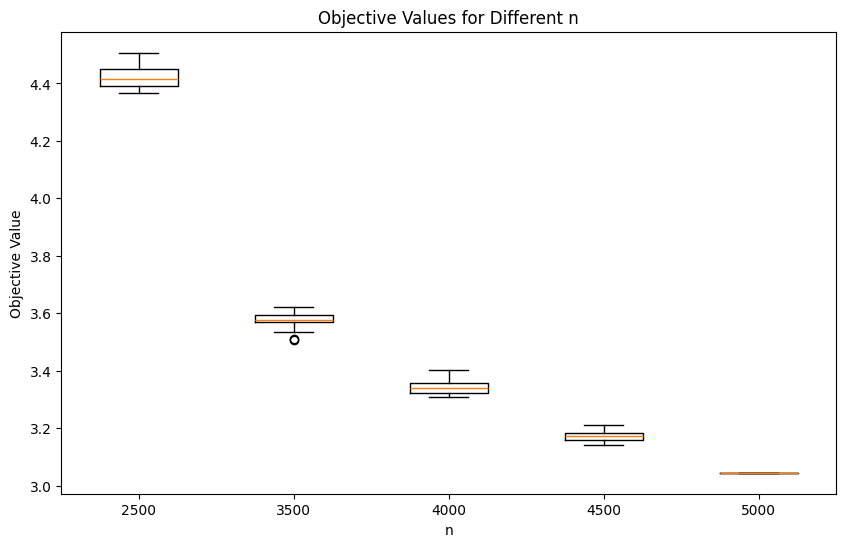

In [ ]:
# Plot the objective values, box plot
plt.figure(figsize=(10, 6))
plt.boxplot(objective_values.values(), labels=objective_values.keys())
plt.xlabel('n')
plt.ylabel('Objective Value')
plt.title('Objective Values for Different n')
plt.show()

Now we get individual W for all n's.
For each n, we take the class means and calculate their projection.
Then we can just take a point and calculate euclidean distance from all the mean projections and assign the class accordingly.

In [ ]:
all_mean_projections = []
for i,_ in enumerate(W_T_all):
    W = _[0]

    m0_proj = np.dot(m0, W) # since W.T * m0 = m0 * W
    m1_proj = np.dot(m1, W)
    m2_proj = np.dot(m2, W)
    m3_proj = np.dot(m3, W)

    # print("n:", n_all[i])
    # print("m0_proj:", m0_proj)
    # print("m1_proj:", m1_proj)
    # print("m2_proj:", m2_proj)
    # print("m3_proj:", m3_proj)

    all_mean_projections.append([m0_proj, m1_proj, m2_proj, m3_proj])

print("all_mean_projections:", all_mean_projections)



all_mean_projections: [[array([-0.00115689,  0.01538847, -0.00189735]), array([-0.00442454,  0.00013871, -0.00026833]), array([-0.03921858,  0.01009712,  0.00275751]), array([-0.0400333 ,  0.00685457, -0.00489836])]]


## TESTING:

In [ ]:
# Function to calculate the Gaussian likelihood
def gaussian_likelihood(y, mu, sigma):
    d = y.shape[0]  # Dimensionality of y
    sigma_inv = np.linalg.pinv(sigma)
    diff = y - mu

    # Calculate the exponent term: (y - mu)^T * sigma^-1 * (y - mu)
    exponent = -0.5 * np.dot(diff.T, np.dot(sigma_inv, diff))

    # Normalization constant (without using scipy)
    det_sigma = np.linalg.det(sigma)
    norm_const = (2 * np.pi) ** (d / 2) * np.sqrt(det_sigma)

    return np.exp(exponent) / norm_const

def posterior(y, mu, sigma, prior):
    return gaussian_likelihood(y, mu, sigma) * prior

In [ ]:
for n, _ in enumerate(W_T_all):
    W = _[0]
    false_count = 0
    count_test = test_img.shape[0]

    # flatten the test images
    test_img = test_img.reshape(test_img.shape[0], -1)

    # We project the test images onto the subspace spanned by the eigenvectors
    test_img_proj = np.dot(test_img, W)


    # Assuming equal priors
    prior = 1 / c  # c = number of classes
    s_W = np.cov(train_img_proj.T)

    # Project a new datapoint x: y = W.T @ x
    for y in test_img_proj:

        # Calculate posteriors for each class (m0_proj, ..., m3_proj are projected means)
        posteriors = [
            posterior(y, m0_proj, s_W, prior),
            posterior(y, m1_proj, s_W, prior),
            posterior(y, m2_proj, s_W, prior),
            posterior(y, m3_proj, s_W, prior)
        ]
        predicted_class = np.argmax(posteriors)

        if predicted_class != test_labels[i]:
            false_count += 1
            

    print("n:", n_all[n])
    print("False count:", false_count)
    print("Accuracy:", 1 - false_count/count_test)

n: 5000
False count: 738
Accuracy: 0.262


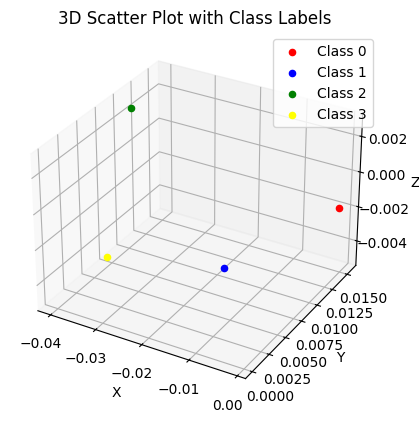

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Data
points = np.array([
    [-0.00115689, 0.01538847, -0.00189735],
    [-0.00442454, 0.00013871, -0.00026833],
    [-0.03921858, 0.01009712, 0.00275751],
    [-0.0400333, 0.00685457, -0.00489836]
])

# Labels
labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Colors
colors = ['red', 'blue', 'green', 'yellow']

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(points)):
    ax.scatter(points[i, 0], points[i, 1], points[i, 2], c=colors[i], label=labels[i])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot with Class Labels')
ax.legend()

plt.show()